<a href="https://colab.research.google.com/github/koojaekwan/python_practice/blob/master/jaekwankoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.1 준비단계 - 구글드라이브 연동

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


## 1.2 라이브러리 및 데이터 불러오기

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from plotnine import *
from plotnine.data import *
import gc

In [ ]:
print(os.getcwd()) # 현재 경로

/content


In [4]:
data = pd.read_csv("/content/gdrive/My Drive/coding_test/group_call_HMS.csv")

In [ ]:
data

,call_start_day,call_start_time,call_end_day,call_end_time,hashed
0,1,09:14:58.558,1,09:41:30.200,967393e81d99ce8e577ee130b7ce8e4fd45e3e9cecb560...
1,17,11:05:05.176,17,13:07:42.515,02181a0c962f34f019bc9d5b582fb0ec79b1441f96aa4d...
2,20,02:18:43.172,20,02:28:58.177,86022904c5cf72a54978479c94041f4256d6c3c2a1f71c...
3,22,09:22:01.936,22,09:47:40.192,aafb40d212fe18ff4eafb82fdcf3b53f2161cb3ce59de4...
4,26,06:29:21.182,26,06:50:55.004,c87c2fad141edf323f3787335b54be22945a02fe052448...
...,...,...,...,...,...
6962336,55,08:09:30.086,55,08:29:51.324,a4b6aea6cb58e43911e7cb7d6c0497197db7c4ed16e1c9...
6962337,35,11:25:25.719,35,11:47:41.557,4ec597c569b92bd0e1bae4e2a06e13b9657fb81795e194...
6962338,47,16:29:59.882,47,16:30:27.386,8092e194a750aae539862ed4405f67a6dd5b492e7e57e3...
6962339,48,23:43:52.265,48,23:47:50.285,7176c1516207692857535c30a4650b8e8e586af1fed0fd...


### 1.2.1 데이터 정보

In [ ]:
data.isnull().sum()

call_start_day     0
call_start_time    0
call_end_day       0
call_end_time      0
hashed             0
dtype: int64

모든 컬럼에 결측값은 존재하지 않는다.

In [ ]:
data.duplicated().sum()

0

각 row중 겹치는 데이터는 없다

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962341 entries, 0 to 6962340
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   call_start_day   int64 
 1   call_start_time  object
 2   call_end_day     int64 
 3   call_end_time    object
 4   hashed           object
dtypes: int64(2), object(3)
memory usage: 265.6+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format  # 과학적 표기법(Scientific notation)을 사용하지 않는 경우

data.describe()

,call_start_day,call_end_day
count,6962341.00,6962341.00
mean,35.83,35.86
std,16.26,16.25
min,1.00,1.00
25%,23.00,23.00
50%,41.00,41.00
75%,50.00,50.00
max,56.00,57.00


In [ ]:
# temp = pd.Timestamp(data.call_start_time[1])
# print(data.call_start_time[1])
# print(temp)
# print("time : ",temp.time())

## 2.1 통화 & 사람


약 100만 rows씩 작업 진행

In [ ]:
p = set(np.concatenate(data.loc[0:1000000,"hashed"].str.split(",").values))
p2 = set(np.concatenate(data.loc[1000001:2000000,"hashed"].str.split(",").values))
p3 = set(np.concatenate(data.loc[2000001:3000000,"hashed"].str.split(",").values))
p4 = set(np.concatenate(data.loc[3000001:4000000,"hashed"].str.split(",").values))
p5 = set(np.concatenate(data.loc[4000001:5000000,"hashed"].str.split(",").values))
p6 = set(np.concatenate(data.loc[5000001:6000000,"hashed"].str.split(",").values))
p7 = set(np.concatenate(data.loc[6000001:,"hashed"].str.split(",").values))

한번에 약 700만 개의 행들을 처리하려고 했으나, 램이 부족한 문제로 행들을 구간별로 나눠서 처리하는 방향으로 생각했다.  

### 2.1.1 데이터에서 온전히 통화에 참여한 인원수(중복이 없음)

In [ ]:
print("총 통화한 인원수 : ", len(set(list(p)+list(p2)+list(p3)+list(p4)+list(p5)+list(p6)+list(p7))), "명") # 중복이 없는 데이터에서 순수 통화에 참여한 수

총 통화한 인원수 :  268148 명


약 700만 건의 통화리스트에 참여한 사람들 중 unique한 사람들만 카운트한 것이다.

### 2.1.2 데이터에서 1회 통화에 참여한 평균인원 수

In [5]:
data['p_num'] = data['hashed'].str.count(pat = ",") + 1  # 각 통화 건수의 통화한 사람 수

사람들은 각 행별로 , 로 구분되어 있다. 따라서 통화가 일어나는 사건을 나타내는  각 행의 통화에 참여하는 사람수를 구하려면 **,** 갯수에 1을 더하면 된다.

In [ ]:
print("1회 통화에 참여한 평균인원수 : ", data["p_num"].sum() / len(data), "명") # 전체 총 통화한 사람수 / 전체 통화 건수 = 1회 통화 평균인원수

1회 통화에 참여한 평균인원수 :  4.924246313129449 명


평균적으로 4.92명이 각 통화에 참여했다. 각 통화데이터에서의 평균적으로 참여한 사람의 수이므로 중복된 사람이 있을 수도 있다.

In [ ]:
print("max : ", data["p_num"].max(), ",  min : ", data["p_num"].min())

max :  434 ,  min :  1


혼자 통화에 참여한 사람이 있고, 최대 434명이 함께 통화에 참여한 경우를 확인 가능하다.

### 2.1.3 datetime으로의 전처리

In [ ]:
temp = [x for x in data["hashed"].str.split(",")]

In [ ]:
len(temp)

6962341

In [ ]:
len(data['hashed'].unique())

3184944

통화리스트 중 duplicated로 중복된 데이터가 없음을 확인했다.  
hashed에는 중복된 데이터가 있는 것으로 봐서 몇 그룹들은 한번을 초과하는 전화를 한 것으로 보인다.

In [ ]:
# temp = pd.Timestamp(data.call_start_time[1])
# print(data.call_start_time[1])
# print(temp)
# print("time : ",temp.time())

In [ ]:
print(pd.Timestamp("08:09:30.086"))  # example
print(pd.Timestamp("08:29:51.324"))

2020-08-20 08:09:30.086000
2020-08-20 08:29:51.324000


In [ ]:
pd.Timestamp("08:29:51.324") - pd.Timestamp("08:09:30.086")

Timedelta('0 days 00:20:21.238000')

In [6]:
data['diff_day'] = data["call_end_day"] - data["call_start_day"]

전화 시작 날과 끝난 날의 차이를 확인하였다.  
자정을 기준으로 넘어가는 날짜가 있는 것에 대해 시간 계산을 용이하게 하기 위함이다.

In [ ]:
# data = data.drop(["new_end_day"], axis = 1)

In [7]:
data['call_start_time'] = pd.to_datetime(data['call_start_time'], format='%H:%M:%S.%f', errors='raise')
data['call_end_time'] = pd.to_datetime(data['call_end_time'], format='%H:%M:%S.%f', errors='raise')

In [ ]:
# datetime.timedelta(days = data['diff_day'])

In [48]:
data

,call_start_day,call_start_time,call_end_day,call_end_time,hashed,p_num,diff_day
0,1,1900-01-01 09:14:58.558,1,1900-01-01 09:41:30.200,967393e81d99ce8e577ee130b7ce8e4fd45e3e9cecb560...,3,0
1,17,1900-01-01 11:05:05.176,17,1900-01-01 13:07:42.515,02181a0c962f34f019bc9d5b582fb0ec79b1441f96aa4d...,5,0
2,20,1900-01-01 02:18:43.172,20,1900-01-01 02:28:58.177,86022904c5cf72a54978479c94041f4256d6c3c2a1f71c...,3,0
3,22,1900-01-01 09:22:01.936,22,1900-01-01 09:47:40.192,aafb40d212fe18ff4eafb82fdcf3b53f2161cb3ce59de4...,6,0
4,26,1900-01-01 06:29:21.182,26,1900-01-01 06:50:55.004,c87c2fad141edf323f3787335b54be22945a02fe052448...,6,0
...,...,...,...,...,...,...,...
6962336,55,1900-01-01 08:09:30.086,55,1900-01-01 08:29:51.324,a4b6aea6cb58e43911e7cb7d6c0497197db7c4ed16e1c9...,6,0
6962337,35,1900-01-01 11:25:25.719,35,1900-01-01 11:47:41.557,4ec597c569b92bd0e1bae4e2a06e13b9657fb81795e194...,12,0
6962338,47,1900-01-01 16:29:59.882,47,1900-01-01 16:30:27.386,8092e194a750aae539862ed4405f67a6dd5b492e7e57e3...,6,0
6962339,48,1900-01-01 23:43:52.265,48,1900-01-01 23:47:50.285,7176c1516207692857535c30a4650b8e8e586af1fed0fd...,6,0


In [8]:
data['new_end_time'] = data['call_end_time'] + pd.to_timedelta(data['diff_day'], unit='d')

전화 시간에도 datetime타입을 적용시켜 날짜 차이와 계산이 가능하게 한다.  
새로운 끝나는 날짜로 잡아 각 사건 별 통화 시간을 구할 수 있다.

### 2.1.4 각 통화 별 통화시간

날짜를 넘어가는 것에 대해서 계산을 하기 위해 시작날과 끝날의 차이를 end_time에 더한 뒤 start_time과의 연산을 통해 시간 차를 구할 수 있다.

In [9]:
data['call_duration'] = data['new_end_time'] - data['call_start_time']

In [ ]:
data[['call_duration']]

,call_duration
0,00:26:31.642000
1,02:02:37.339000
2,00:10:15.005000
3,00:25:38.256000
4,00:21:33.822000
...,...
6962336,00:20:21.238000
6962337,00:22:15.838000
6962338,00:00:27.504000
6962339,00:03:58.020000


### 2.1.5 총 통화시간


In [8]:
data['call_duration'] = pd.to_timedelta(data['call_duration'])

In [ ]:
print (data.dtypes)

call_start_day               int64
call_start_time     datetime64[ns]
call_end_day                 int64
call_end_time       datetime64[ns]
hashed                      object
p_num                        int64
diff_day                     int64
new_end_time        datetime64[ns]
call_duration      timedelta64[ns]
dtype: object


In [ ]:
print(data.call_duration[0:5900000].sum())
print(data.call_duration[5900001:].sum())

106067 days 16:21:12.281008
19106 days 01:06:28.455999


600만개의 행이 넘어가면 총 통화시간 계산에 에러가 난다. 따라서 초로 바꾼 뒤, 진행을 해보자

In [ ]:
data.call_duration.dt.total_seconds().sum() / (3600*24)

125173.73817542837

약 125173.74일 정도 전체 통화량이 나타내고 있다.

In [ ]:
data.describe()

,call_start_day,call_end_day,p_num,diff_day,call_duration
count,6962341.00,6962341.00,6962341.00,6962341.00,6962341
mean,35.83,35.86,4.92,0.03,0 days 00:25:53.358414
std,16.26,16.25,2.37,0.20,0 days 03:18:07.730969
min,1.00,1.00,1.00,0.00,0 days 00:00:00
25%,23.00,23.00,3.00,0.00,0 days 00:01:38.387000
50%,41.00,41.00,6.00,0.00,0 days 00:09:31.063000
75%,50.00,50.00,6.00,0.00,0 days 00:18:48.020000
max,56.00,57.00,434.00,7.00,6 days 17:07:59.592000


전화를 시도했지만 안받은 건수도 존재한다.

## 3.1 사람별 통계량 

### 3.1.1 데이터 전처리

In [10]:
data['call_num'] = 1

In [11]:
data['call_duration'] = data['call_duration'].dt.total_seconds()

각 hashed(사람)별로 데이터프레임의 구조를 변경하기 위해서는 ,로 구분된 **hashed**의 각 요소들을 구분해야 한다.  
사람별 총 통화건수를 확인하기 위해 **call_num**이라는 변수에 1이라는 값을 부여 

In [12]:
data['call_duration'] = data['call_duration'] / 3600

In [55]:
data

,call_start_day,call_start_time,call_end_day,call_end_time,hashed,p_num,diff_day,new_end_time,call_duration,call_num
0,1,1900-01-01 09:14:58.558,1,1900-01-01 09:41:30.200,967393e81d99ce8e577ee130b7ce8e4fd45e3e9cecb560...,3,0,1900-01-01 09:41:30.200,0.442123,1
1,17,1900-01-01 11:05:05.176,17,1900-01-01 13:07:42.515,02181a0c962f34f019bc9d5b582fb0ec79b1441f96aa4d...,5,0,1900-01-01 13:07:42.515,2.043705,1
2,20,1900-01-01 02:18:43.172,20,1900-01-01 02:28:58.177,86022904c5cf72a54978479c94041f4256d6c3c2a1f71c...,3,0,1900-01-01 02:28:58.177,0.170835,1
3,22,1900-01-01 09:22:01.936,22,1900-01-01 09:47:40.192,aafb40d212fe18ff4eafb82fdcf3b53f2161cb3ce59de4...,6,0,1900-01-01 09:47:40.192,0.427293,1
4,26,1900-01-01 06:29:21.182,26,1900-01-01 06:50:55.004,c87c2fad141edf323f3787335b54be22945a02fe052448...,6,0,1900-01-01 06:50:55.004,0.359395,1
...,...,...,...,...,...,...,...,...,...,...
6962336,55,1900-01-01 08:09:30.086,55,1900-01-01 08:29:51.324,a4b6aea6cb58e43911e7cb7d6c0497197db7c4ed16e1c9...,6,0,1900-01-01 08:29:51.324,0.339233,1
6962337,35,1900-01-01 11:25:25.719,35,1900-01-01 11:47:41.557,4ec597c569b92bd0e1bae4e2a06e13b9657fb81795e194...,12,0,1900-01-01 11:47:41.557,0.371066,1
6962338,47,1900-01-01 16:29:59.882,47,1900-01-01 16:30:27.386,8092e194a750aae539862ed4405f67a6dd5b492e7e57e3...,6,0,1900-01-01 16:30:27.386,0.007640,1
6962339,48,1900-01-01 23:43:52.265,48,1900-01-01 23:47:50.285,7176c1516207692857535c30a4650b8e8e586af1fed0fd...,6,0,1900-01-01 23:47:50.285,0.066117,1


In [12]:
temp1 = data.loc[0:1000000,["hashed","p_num","call_duration","call_num"]]
temp2 = data.loc[1000001:1500000,["hashed","p_num","call_duration","call_num"]]
temp3 = data.loc[1500001:2000000,["hashed","p_num","call_duration","call_num"]]
temp4 = data.loc[2000001:3000000,["hashed","p_num","call_duration","call_num"]]
temp5 = data.loc[3000001:4000000,["hashed","p_num","call_duration","call_num"]]
temp6 = data.loc[4000001:5000000,["hashed","p_num","call_duration","call_num"]]
temp7 = data.loc[5000001:6000000,["hashed","p_num","call_duration","call_num"]]
temp8 = data.loc[6000001:,["hashed","p_num","call_duration","call_num"]]

In [ ]:
# temp2['call_duration'] = temp2['call_duration'].dt.total_seconds()
# temp3['call_duration'] = temp3['call_duration'].dt.total_seconds()

In [13]:
def longform(yourdata):
    koo = yourdata.set_index(yourdata.columns.drop('hashed', 1).tolist()).hashed\
        .str.split(',', expand = True)\
        .stack()\
        .reset_index()\
        .rename(columns = {0 : 'hashed'})\
        .loc[:, yourdata.columns]\
        .groupby('hashed').sum()

    return koo

In [14]:
long1 = longform(temp1)
long2 = longform(temp2)
long3 = longform(temp3)
long4 = longform(temp4)
long5 = longform(temp5)
long6 = longform(temp6)
long7 = longform(temp7)
long8 = longform(temp8)

In [15]:
p_data = pd.concat([long1, long2, long3, long4, long5, long6, long7, long8], axis=0).groupby('hashed').sum()

### 3.1.2 파생변수

In [ ]:
p_data.describe()

,p_num,call_duration,call_num
count,268148.000000,268148.000000,268148.000000
mean,775.856691,55.175152,127.855818
std,1405.315175,117.862558,257.100419
min,1.000000,0.000000,1.000000
25%,25.000000,0.592366,3.000000
50%,156.000000,7.244065,24.000000
75%,856.000000,57.718960,143.000000
max,94441.000000,14273.206788,31498.000000


In [ ]:
p_data

,p_num,call_duration,call_num
hashed,,,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,6370,476.383468,1049
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,3625,532.616013,777
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,48,1.161509,9
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,224,14.592088,37
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,992,53.649001,222
...,...,...,...
fffdd5bc78ceb19e7abe25de14dc42fbd9c40fde9570b2d2c620a0c6b27d9427,18,0.028748,1
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,63,4.578250,11
ffff969d1e4c9df210de38d5fd36a4b236db38eb1e73acc6fcc430c18509b7d2,79,2.775712,11


In [16]:
p_data['mean_duration'] = p_data['call_duration'] / p_data['call_num']
p_data['mean_join_person'] = p_data['p_num'] / p_data['call_num']

In [17]:
p_data = p_data.drop('p_num', axis = 1)

In [18]:
p_data

,call_duration,call_num,mean_duration,mean_join_person
hashed,,,,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,476.383468,1049,0.454131,6.072450
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,532.616013,777,0.685477,4.665380
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,1.161509,9,0.129057,5.333333
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,14.592088,37,0.394381,6.054054
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,53.649001,222,0.241662,4.468468
...,...,...,...,...
fffdd5bc78ceb19e7abe25de14dc42fbd9c40fde9570b2d2c620a0c6b27d9427,0.028748,1,0.028748,18.000000
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,4.578250,11,0.416205,5.727273
ffff969d1e4c9df210de38d5fd36a4b236db38eb1e73acc6fcc430c18509b7d2,2.775712,11,0.252337,7.181818


* call_duration : 사람별 총 통화 시간(hour)  
* call_num : 사람별 총 통화 횟수(회)  
* mean_duration : 사람별 평균 통화 시간(hour)  
* mean_join_person : 사람별 통화 건수마다 참여한 평균 사람 수(명)



In [19]:
# p_data.to_pickle("./gdrive/My Drive/coding_test/p_data.pickle")

### 3.1.3 사람별로 몇 명의 사람과 통화를 했을까?(중복없음)

In [4]:
def longform2(yourdata):
    koo = yourdata.set_index(yourdata.columns.drop('hashed', 1).tolist()).hashed\
        .str.split(',', expand = True)\
        .stack()\
        .reset_index()\
        .rename(columns = {0 : 'hashed'})\
        .loc[:, yourdata.columns].loc[:,["hashed"]]
    
    list_hashed = [x for x in yourdata.hashed.str.split(",")]
    repeat_list = pd.DataFrame(np.repeat(list_hashed, yourdata.p_num))
    repeat_list.columns = ['list_hashed']
    
    result = pd.concat([koo.reset_index(drop=True), repeat_list.reset_index(drop=True)], axis=1).groupby('hashed').sum()

    return result

In [5]:
temp1 = data.loc[0:1000000,["hashed","p_num"]]
temp2 = data.loc[1000001:1500000,["hashed","p_num"]]
temp3 = data.loc[1500001:2000000,["hashed","p_num"]]
temp4 = data.loc[2000001:3000000,["hashed","p_num"]]
temp5 = data.loc[3000001:4000000,["hashed","p_num"]]
temp6 = data.loc[4000001:5000000,["hashed","p_num"]]
temp7 = data.loc[5000001:6000000,["hashed","p_num"]]
temp8 = data.loc[6000001:,["hashed","p_num"]]

#### 분리하여 진행  

전체 데이터를 분리하여 작업을 진행한다. 또한, 빠른 작업을 위해 중간 데이터들은 저장하여 후에 불러들이기 편하도록 한다.  
pickle파일은 csv파일보다 읽기, 쓰기면에서 훨씬 빠르며 저장용량도 작을뿐더러 저장된 컬럼의 타입이 유지된다.  

##### 1분할

In [ ]:
count_person1 = longform2(temp1)
count_person2 = longform2(temp2)

In [ ]:
person = pd.concat([count_person1, count_person2], axis = 0).groupby("hashed").sum()
person = person.apply(lambda x : list(set(x.list_hashed)), axis = 1)
person = person.to_frame()
person.columns = ['list_hashed']

In [ ]:
person

,list_hashed
hashed,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,[f79e6538917412350d522962ac5b018faf79ae6cad17e...
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,[d7e4439493ecce45a2fcdc85e8bc9ca8abbab51e3a6f2...
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,[8ca20caa0079470bb63f4b4e58be4cbc38d338a24bda3...
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,[5ed92b00dd7507851ded766b762cb4193fec2d3c579da...
0000d357f373870ecf00e72c10d24e852234de94cc49dc2eff60f161d02443f3,[bad373873775ec988aa91f010f8018b44ea092e75b634...
...,...
fffd9c46a6762a7d4fdc43026abf75ab1a7b9352818f04992578cbf63bfbb471,[6208185bc99539a24aaf468e42aba5f42e8f73448700d...
fffda90a56ec6dcad062a16dd8ee75f7ef85a83b2e2571aa1a523cfe926d2521,[41112949303a3f83d0fe1b753a91b68220fd3274c8ac4...
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,[888b330168e6789bae8b0bc1f9e3fba792745bf222824...


In [ ]:
# person.to_pickle("./gdrive/My Drive/coding_test/first.pickle")

##### 2분할

In [ ]:
del count_person1, count_person2, person
gc.collect()

0

In [14]:
count_person1 = longform2(temp3)
count_person2 = longform2(temp4)

In [15]:
person = pd.concat([count_person1, count_person2], axis = 0).groupby("hashed").sum()
person = person.apply(lambda x : list(set(x.list_hashed)), axis = 1)
person = person.to_frame()
person.columns = ['list_hashed']

In [16]:
# person.to_pickle("./gdrive/My Drive/coding_test/first2.pickle")

##### 3분할

In [17]:
del count_person1, count_person2, person
gc.collect()

0

In [18]:
count_person1 = longform2(temp3)
count_person2 = longform2(temp4)

In [19]:
person = pd.concat([count_person1, count_person2], axis = 0).groupby("hashed").sum()
person = person.apply(lambda x : list(set(x.list_hashed)), axis = 1)
person = person.to_frame()
person.columns = ['list_hashed']

In [20]:
# person.to_pickle("./gdrive/My Drive/coding_test/first3.pickle")

##### 4분할

In [21]:
del count_person1, count_person2, person
gc.collect()

0

In [22]:
count_person1 = longform2(temp5)
count_person2 = longform2(temp6)

In [23]:
person = pd.concat([count_person1, count_person2], axis = 0).groupby("hashed").sum()
person = person.apply(lambda x : list(set(x.list_hashed)), axis = 1)
person = person.to_frame()
person.columns = ['list_hashed']

In [24]:
# person.to_pickle("./gdrive/My Drive/coding_test/first4.pickle")

##### 5분할

In [25]:
del count_person1, count_person2, person
gc.collect()

0

In [6]:
count_person1 = longform2(temp7)
count_person2 = longform2(temp8)

In [7]:
person = pd.concat([count_person1, count_person2], axis = 0).groupby("hashed").sum()
person = person.apply(lambda x : list(set(x.list_hashed)), axis = 1)
person = person.to_frame()
person.columns = ['list_hashed']

In [8]:
# person.to_pickle("./gdrive/My Drive/coding_test/first5.pickle")

In [9]:
del count_person1, count_person2, person
gc.collect()

0

#### 분리된 데이터 결합 및 도출

In [20]:
data1 = pd.read_pickle('./gdrive/My Drive/coding_test/first.pickle')
data2 = pd.read_pickle('./gdrive/My Drive/coding_test/first2.pickle')
data3 = pd.read_pickle('./gdrive/My Drive/coding_test/first3.pickle')
data4 = pd.read_pickle('./gdrive/My Drive/coding_test/first4.pickle')
data5 = pd.read_pickle('./gdrive/My Drive/coding_test/first5.pickle')

In [21]:
result = pd.concat([data1, data2, data3, data4, data5], axis=0).groupby("hashed").sum()

In [14]:
result

,list_hashed
hashed,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,[dc0a4f3f865d5f2d2ee8926a23aaa38fdc7297abfaba0...
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,[b6808e11375e3323cc5164ce753fec03341abc592e410...
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,[00006916672106f94f68d18e4a0532b53a40f4549d3a6...
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,[fa6e296049258b13bb56617120e80f4a0c5372803d611...
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,[267609469b70814411904a114b2399af471ff665c8a19...
...,...
fffdd5bc78ceb19e7abe25de14dc42fbd9c40fde9570b2d2c620a0c6b27d9427,[b235b57b2430cdf65cd04d0c5f8eafa792b57db50abcb...
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,[888b330168e6789bae8b0bc1f9e3fba792745bf222824...
ffff969d1e4c9df210de38d5fd36a4b236db38eb1e73acc6fcc430c18509b7d2,[e941c011659a2615e382b541d9f22e9a63169480894f7...


In [22]:
result['unique_person'] = result.apply(lambda x : list(set(x.list_hashed)), axis = 1)
result['people_len'] = result.apply(lambda x : len(x.unique_person)-1, axis = 1)
result = result.drop('list_hashed', axis = 1)

In [23]:
result

,unique_person,people_len
hashed,,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,[3965253ae86be073599a9955218f070b5264c669d16fd...,86
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,[245eaf305726e67bfe1358a750c553d060aa9ea9a99ba...,613
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,[02db66d82cf06a178f1ebd08ef29b7c377c6a7fd5129b...,34
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,[f60ec609426cb858c81b19ce09fd99555a56eb5180567...,17
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,[4119c150dc532c566ee8a0ee3453108cdad8ca99527c1...,154
...,...,...
fffdd5bc78ceb19e7abe25de14dc42fbd9c40fde9570b2d2c620a0c6b27d9427,[3e6d17ec5b3ca88b5c9df03b452951d87fd3365807596...,17
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,[34388663dfbc371d6772baf8b0979ac445cbe76a7c2ac...,9
ffff969d1e4c9df210de38d5fd36a4b236db38eb1e73acc6fcc430c18509b7d2,[e6230332c61b5cc81e1deb9591b024ed4d8a7321db1b0...,53


unique_person :  자신과 통화했던 unique한 사람들의 목록(본인을 포함)  
people_len : 자신을 제외하고 총 통화리스트에서 본인과 통화한 unique한 사람의 수  

In [25]:
result.head(20)

,unique_person,people_len
hashed,,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,[3965253ae86be073599a9955218f070b5264c669d16fd...,86
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,[245eaf305726e67bfe1358a750c553d060aa9ea9a99ba...,613
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,[02db66d82cf06a178f1ebd08ef29b7c377c6a7fd5129b...,34
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,[f60ec609426cb858c81b19ce09fd99555a56eb5180567...,17
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,[4119c150dc532c566ee8a0ee3453108cdad8ca99527c1...,154
0000d357f373870ecf00e72c10d24e852234de94cc49dc2eff60f161d02443f3,[7a175b1e54c02629c9f6e61478dfea2c0a938f4d89e3a...,76
0000d57170ee9d25dfa6cc8c7fbe88d2ffb561637020a4dec2791f1ee9a56b88,[e0d8f9bf8e0888c2eac0239784c6328fc2c4ae19d69cd...,204
0001aac9fb5b4bd256238e3a0d514c073720973ded700b842eb468aaae534bc8,[0001aac9fb5b4bd256238e3a0d514c073720973ded700...,7
0001d9445b1667721dd2155200332ce22c186be5252049bd5bddbeea6d7aa1c0,[44780e84a7304571196f13f0377dfbe81d2fc79c55e71...,139


In [44]:
result[result['people_len'] == max(result['people_len'])]

,unique_person,people_len
hashed,,
1f8eaf40ae57c75b371a182b2523be7cbf1650cf25e045104384efa510ad99e7,[49057d7650674423c6684bbb3fd98cb9f81f822141ac4...,8356


In [45]:
result[result['people_len'] == min(result['people_len'])]

,unique_person,people_len
hashed,,
00bc9aadd794ceed218bcd2bfd5493127dc546b2a55cb481808f7e9a75c710f6,[00bc9aadd794ceed218bcd2bfd5493127dc546b2a55cb...,0
00cef05a6a988cc460a2ca933c6f636a580eb1cd4874cb7fe76dd830fcc550a7,[00cef05a6a988cc460a2ca933c6f636a580eb1cd4874c...,0
030c40d408bdb354033e229609c55bde9fb35e666cd3c02195a3602b8b1fa537,[030c40d408bdb354033e229609c55bde9fb35e666cd3c...,0
037b964acc204caf31b70f5ca66b321692d2496cdc0c2c4d0e263515151a1837,[037b964acc204caf31b70f5ca66b321692d2496cdc0c2...,0
03a35f2d3df818c29d18b5d4d35d96f401c8b50cb6dd63a5665a766b61648df6,[03a35f2d3df818c29d18b5d4d35d96f401c8b50cb6dd6...,0
...,...,...
fd7240f9d8b63afac9ee062529433ec7347e20ef64302171ef9cc0348037467c,[fd7240f9d8b63afac9ee062529433ec7347e20ef64302...,0
fdbdd29a7f45082f67e9cb12cc1cc184b21e6a9b9ab95ecbdec4f85124198ee9,[fdbdd29a7f45082f67e9cb12cc1cc184b21e6a9b9ab95...,0
fdec854f6d908a2062a8e3cf8a9a002765c624ebf6b611d4c0b951a43e2f9fd9,[fdec854f6d908a2062a8e3cf8a9a002765c624ebf6b61...,0


## 4.1 통합

In [27]:
final_dat = pd.merge(result, p_data, left_on='hashed', right_on='hashed', how='left')

In [28]:
# final_dat.to_pickle("./gdrive/My Drive/coding_test/final_dat.pickle")

In [29]:
final_dat

,unique_person,people_len,call_duration,call_num,mean_duration,mean_join_person
hashed,,,,,,
000020b4fa2af1e40c813436e5054bce70b703d0039dcdad4ccb5b287c3fadbc,[0f030738c371b824d491c0c5e4dc030e13966089d17aa...,86,476.383468,1049,0.454131,6.072450
0000264b01392acfde44f9d8494f112a701dc5d3e5fda6ad090cb205727637e0,[4e792bab0834c2d3853b36f5c14b0a2ee3b4f72a8e1de...,613,532.616013,777,0.685477,4.665380
00006916672106f94f68d18e4a0532b53a40f4549d3a62f0cbf677dd25803668,[a2f0388c7cc0210a56781eb2fc1e98969e7356665ac2e...,34,1.161509,9,0.129057,5.333333
0000988c5778e9d6a861fee8fbfd88ec2fdc9108c1acd6d9c0b4d51637787b37,[0e7a8b8e287304812fe5a3f4610a7bd90a01da419da1d...,17,14.592088,37,0.394381,6.054054
0000a2ff91f6891797708f346d8e3790fa75c1872d6fdc8cf9b4c98ad2112dd3,[3b878800d2fb2a9cfb537126086b52fcc31e13d34917c...,154,53.649001,222,0.241662,4.468468
...,...,...,...,...,...,...
fffdd5bc78ceb19e7abe25de14dc42fbd9c40fde9570b2d2c620a0c6b27d9427,[ecbb877e7d82cdc176a8e16c62c07be8a43cd5191028c...,17,0.028748,1,0.028748,18.000000
fffec3d7fa3b91fbb1ec4283e90a757571c5f5efc8c6d008af60ac1fee3206ca,[dd43636bf1ee2322973bd4db29125f5ce3325eb4b844b...,9,4.578250,11,0.416205,5.727273
ffff969d1e4c9df210de38d5fd36a4b236db38eb1e73acc6fcc430c18509b7d2,[94e59616f192494822891ea5a80d92a749018b16b66ee...,53,2.775712,11,0.252337,7.181818


In [30]:
final_dat[final_dat['people_len'] == max(final_dat['people_len'])]

,unique_person,people_len,call_duration,call_num,mean_duration,mean_join_person
hashed,,,,,,
1f8eaf40ae57c75b371a182b2523be7cbf1650cf25e045104384efa510ad99e7,[b9d849e199d5efaa0b86b9949a8a3e6a1b6446fc3b58b...,8356,1248.108499,2426,0.514472,6.4662


In [39]:
final_dat[final_dat['people_len'] == min(final_dat['people_len'])]

,unique_person,people_len,call_duration,call_num,mean_duration,mean_join_person
hashed,,,,,,
00bc9aadd794ceed218bcd2bfd5493127dc546b2a55cb481808f7e9a75c710f6,[00bc9aadd794ceed218bcd2bfd5493127dc546b2a55cb...,0,0.033770,1,0.033770,1.0
00cef05a6a988cc460a2ca933c6f636a580eb1cd4874cb7fe76dd830fcc550a7,[00cef05a6a988cc460a2ca933c6f636a580eb1cd4874c...,0,0.013026,1,0.013026,1.0
030c40d408bdb354033e229609c55bde9fb35e666cd3c02195a3602b8b1fa537,[030c40d408bdb354033e229609c55bde9fb35e666cd3c...,0,0.003584,1,0.003584,1.0
037b964acc204caf31b70f5ca66b321692d2496cdc0c2c4d0e263515151a1837,[037b964acc204caf31b70f5ca66b321692d2496cdc0c2...,0,0.024467,1,0.024467,1.0
03a35f2d3df818c29d18b5d4d35d96f401c8b50cb6dd63a5665a766b61648df6,[03a35f2d3df818c29d18b5d4d35d96f401c8b50cb6dd6...,0,0.176282,1,0.176282,1.0
...,...,...,...,...,...,...
fd7240f9d8b63afac9ee062529433ec7347e20ef64302171ef9cc0348037467c,[fd7240f9d8b63afac9ee062529433ec7347e20ef64302...,0,1.245996,1,1.245996,1.0
fdbdd29a7f45082f67e9cb12cc1cc184b21e6a9b9ab95ecbdec4f85124198ee9,[fdbdd29a7f45082f67e9cb12cc1cc184b21e6a9b9ab95...,0,0.047696,1,0.047696,1.0
fdec854f6d908a2062a8e3cf8a9a002765c624ebf6b611d4c0b951a43e2f9fd9,[fdec854f6d908a2062a8e3cf8a9a002765c624ebf6b61...,0,0.028781,1,0.028781,1.0


## 4.2 추가적인 정보

In [94]:
final_dat.describe()

,people_len,call_duration,call_num,mean_duration,mean_join_person
count,268148.000000,268148.000000,268148.000000,268148.000000,268148.000000
mean,215.388293,55.175152,127.855818,0.440048,8.216959
std,510.908693,117.862558,257.100419,1.625686,7.958346
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,11.000000,0.592366,3.000000,0.184124,5.270068
50%,36.000000,7.244065,24.000000,0.269788,6.058766
75%,148.000000,57.718960,143.000000,0.408504,7.500000
max,8356.000000,14273.206788,31498.000000,156.490907,221.500000


### 4.2.1 Boxplot

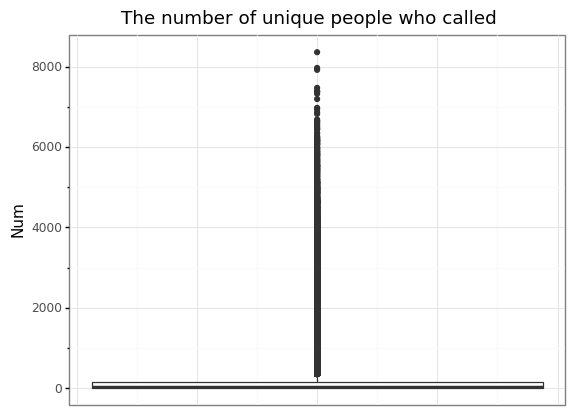

<ggplot: (8784502696754)>

In [91]:
ggplot(data=final_dat) +\
geom_boxplot(aes(x=1,y="people_len")) +\
ggtitle("The number of unique people who called")+\
xlab("") +\
ylab("Num") +\
theme_bw() +\
theme(axis_ticks_minor_x=element_blank(),
      axis_ticks_major_x=element_blank(),
      axis_text_x=element_blank())

사람별로 통화를 했던 유니크한 사람들의 수에 대한 boxplot 

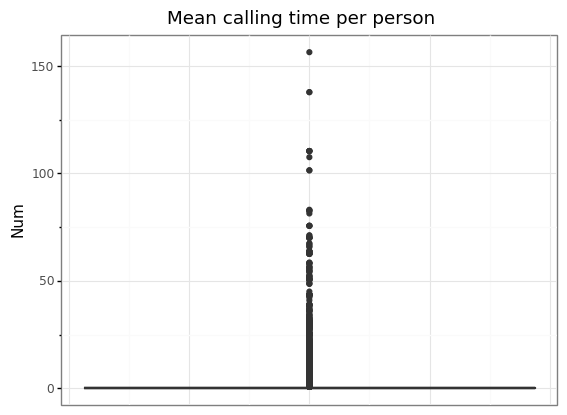

<ggplot: (-9223363252352801378)>

In [92]:
ggplot(data=final_dat) +\
geom_boxplot(aes(x=1,y="mean_duration")) +\
ggtitle("Mean calling time per person")+\
xlab("") +\
ylab("") +\
theme_bw() +\
theme(axis_ticks_minor_x=element_blank(),
      axis_ticks_major_x=element_blank(),
      axis_text_x=element_blank())

한 사람 당 평균 통화 시간은 대부분이 1시간이 되지 않았지만, 훨씬 초과하는 사람의 경우도 있었다.

In [27]:
data["start_hour"] = data['call_start_time'].dt.hour
data["end_hour"] = data['call_end_time'].dt.hour

### 4.2.2 통화 시작, 통화 끝

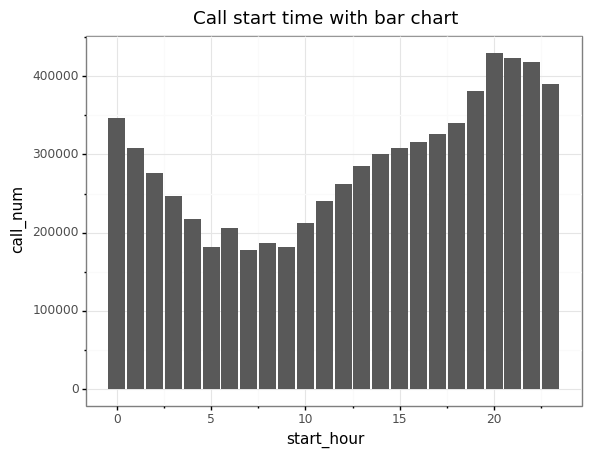

<ggplot: (-9223363293614737762)>

In [31]:
ggplot(data.loc[:,['start_hour','call_num']].groupby('start_hour').count().reset_index()) +\
geom_bar(aes(x = 'start_hour', y = 'call_num'), stat = "identity") +\
theme_bw() +\
ggtitle("Call start time with bar chart")

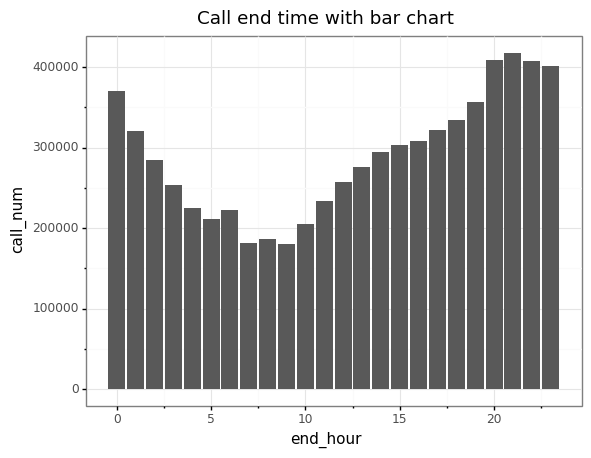

<ggplot: (-9223363293543158349)>

In [39]:
ggplot(data.loc[:,['end_hour','call_num']].groupby('end_hour').count().reset_index()) +\
geom_bar(aes(x = 'end_hour', y = 'call_num'), stat = "identity") +\
theme_bw() +\
ggtitle("Call end time with bar chart")

통화 시작 시간대와 끝 시간대의 빈도 막대그래프이다.  
저녁 시간대에 통화 빈도가 높다. 취침 시간대에는 상대적으로 통화 빈도가 낮다.

### 4.2.3 통화에 참여하는 사람들

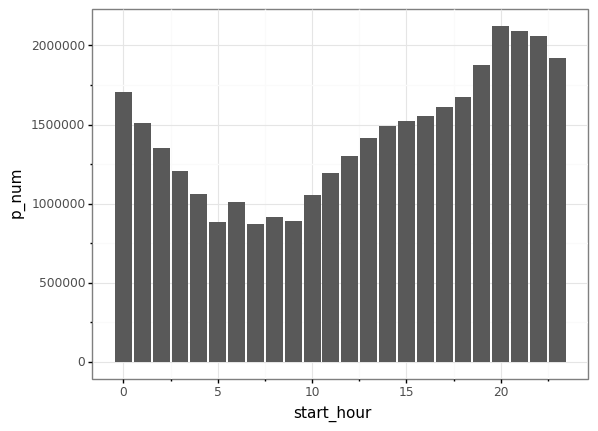

<ggplot: (8743233778173)>

In [50]:
ggplot(data.loc[:,["start_hour","p_num","call_num"]].groupby('start_hour').sum().reset_index()) +\
geom_bar(aes(x = "start_hour", y = "p_num"), stat = "identity") +\
theme_bw()

시간대별 통화에 참여하는 사람들의 분포이다. 통화 시작 시간대의 분포와 비슷해보인다.

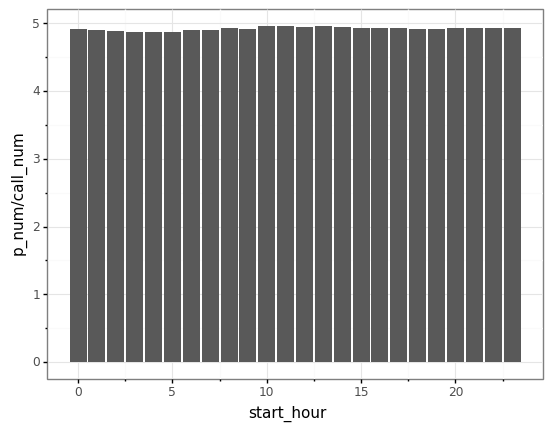

<ggplot: (8743213735232)>

In [49]:
ggplot(data.loc[:,["start_hour","p_num","call_num"]].groupby('start_hour').sum().reset_index()) +\
geom_bar(aes(x = "start_hour", y = "p_num/call_num"), stat = "identity") +\
theme_bw()

시간대별 통화에 참여하는 사람 수와 통화 수의 비율을 보니 시각별로 거의 일정한 uniform 형태를 보이고 있다.  
시간대별로 통화 수 대비 참여자 수의 차이는 없어보인다.

In [45]:
data

,call_start_day,call_start_time,call_end_day,call_end_time,hashed,p_num,diff_day,new_end_time,call_duration,call_num,start_hour,end_hour
0,1,1900-01-01 09:14:58.558,1,1900-01-01 09:41:30.200,967393e81d99ce8e577ee130b7ce8e4fd45e3e9cecb560...,3,0,1900-01-01 09:41:30.200,0.442123,1,9,9
1,17,1900-01-01 11:05:05.176,17,1900-01-01 13:07:42.515,02181a0c962f34f019bc9d5b582fb0ec79b1441f96aa4d...,5,0,1900-01-01 13:07:42.515,2.043705,1,11,13
2,20,1900-01-01 02:18:43.172,20,1900-01-01 02:28:58.177,86022904c5cf72a54978479c94041f4256d6c3c2a1f71c...,3,0,1900-01-01 02:28:58.177,0.170835,1,2,2
3,22,1900-01-01 09:22:01.936,22,1900-01-01 09:47:40.192,aafb40d212fe18ff4eafb82fdcf3b53f2161cb3ce59de4...,6,0,1900-01-01 09:47:40.192,0.427293,1,9,9
4,26,1900-01-01 06:29:21.182,26,1900-01-01 06:50:55.004,c87c2fad141edf323f3787335b54be22945a02fe052448...,6,0,1900-01-01 06:50:55.004,0.359395,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6962336,55,1900-01-01 08:09:30.086,55,1900-01-01 08:29:51.324,a4b6aea6cb58e43911e7cb7d6c0497197db7c4ed16e1c9...,6,0,1900-01-01 08:29:51.324,0.339233,1,8,8
6962337,35,1900-01-01 11:25:25.719,35,1900-01-01 11:47:41.557,4ec597c569b92bd0e1bae4e2a06e13b9657fb81795e194...,12,0,1900-01-01 11:47:41.557,0.371066,1,11,11
6962338,47,1900-01-01 16:29:59.882,47,1900-01-01 16:30:27.386,8092e194a750aae539862ed4405f67a6dd5b492e7e57e3...,6,0,1900-01-01 16:30:27.386,0.007640,1,16,16
6962339,48,1900-01-01 23:43:52.265,48,1900-01-01 23:47:50.285,7176c1516207692857535c30a4650b8e8e586af1fed0fd...,6,0,1900-01-01 23:47:50.285,0.066117,1,23,23


### 4.2.4 참여인원 수와 통화길이

In [51]:
data.loc[:,['p_num','call_duration']]

,p_num,call_duration
0,3,0.442123
1,5,2.043705
2,3,0.170835
3,6,0.427293
4,6,0.359395
...,...,...
6962336,6,0.339233
6962337,12,0.371066
6962338,6,0.007640
6962339,6,0.066117


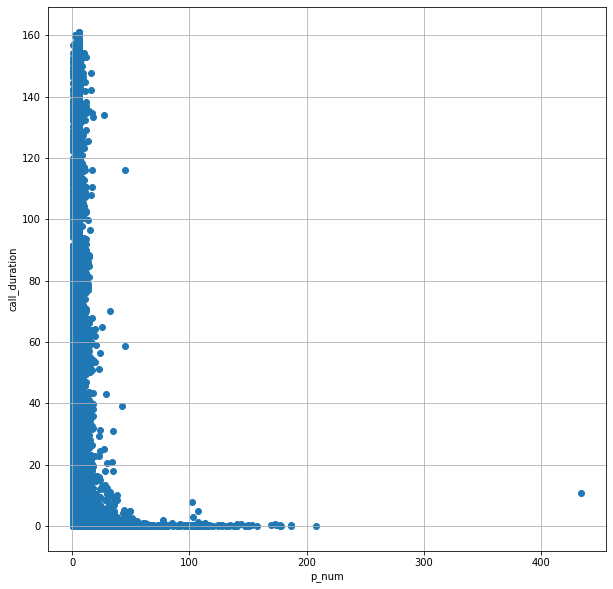

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# 산점도
plt.figure(figsize=(10, 10))         # 사이즈 지정
plt.scatter(data.loc[:,['p_num','call_duration']].p_num, data.loc[:,['p_num','call_duration']].call_duration) # 산점도
plt.xlabel("p_num")                  # x축 레이블
plt.ylabel("call_duration")          # y축 레이블
plt.grid()                           # 격자
plt.show()                           

In [54]:
import scipy.stats as stats

# 피어슨 상관계수 검정
stats.pearsonr(data.loc[:,['p_num','call_duration']].p_num, data.loc[:,['p_num','call_duration']].call_duration)

(3.363073089978583e-05, 0.9292551508473222)

* 한 통화당 참여인원이 많을수록 통화 기간이 길것이라고 생각했지만, 산점도를 보더라도 그렇게 보이지 않는다.  
* 피어슨 상관계수 검정을 통해 확인했을 때, 상관계수가 거의 0이고 p-value또한 약 0.93으로 상관관계가 없다는 귀무가설을 기각하지 못한다. 즉, 참여인원과 통화 길이는 상관 관계가 없다

### 4.2.5 시간대별 평균 통화 길이

In [55]:
data

,call_start_day,call_start_time,call_end_day,call_end_time,hashed,p_num,diff_day,new_end_time,call_duration,call_num,start_hour,end_hour
0,1,1900-01-01 09:14:58.558,1,1900-01-01 09:41:30.200,967393e81d99ce8e577ee130b7ce8e4fd45e3e9cecb560...,3,0,1900-01-01 09:41:30.200,0.442123,1,9,9
1,17,1900-01-01 11:05:05.176,17,1900-01-01 13:07:42.515,02181a0c962f34f019bc9d5b582fb0ec79b1441f96aa4d...,5,0,1900-01-01 13:07:42.515,2.043705,1,11,13
2,20,1900-01-01 02:18:43.172,20,1900-01-01 02:28:58.177,86022904c5cf72a54978479c94041f4256d6c3c2a1f71c...,3,0,1900-01-01 02:28:58.177,0.170835,1,2,2
3,22,1900-01-01 09:22:01.936,22,1900-01-01 09:47:40.192,aafb40d212fe18ff4eafb82fdcf3b53f2161cb3ce59de4...,6,0,1900-01-01 09:47:40.192,0.427293,1,9,9
4,26,1900-01-01 06:29:21.182,26,1900-01-01 06:50:55.004,c87c2fad141edf323f3787335b54be22945a02fe052448...,6,0,1900-01-01 06:50:55.004,0.359395,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6962336,55,1900-01-01 08:09:30.086,55,1900-01-01 08:29:51.324,a4b6aea6cb58e43911e7cb7d6c0497197db7c4ed16e1c9...,6,0,1900-01-01 08:29:51.324,0.339233,1,8,8
6962337,35,1900-01-01 11:25:25.719,35,1900-01-01 11:47:41.557,4ec597c569b92bd0e1bae4e2a06e13b9657fb81795e194...,12,0,1900-01-01 11:47:41.557,0.371066,1,11,11
6962338,47,1900-01-01 16:29:59.882,47,1900-01-01 16:30:27.386,8092e194a750aae539862ed4405f67a6dd5b492e7e57e3...,6,0,1900-01-01 16:30:27.386,0.007640,1,16,16
6962339,48,1900-01-01 23:43:52.265,48,1900-01-01 23:47:50.285,7176c1516207692857535c30a4650b8e8e586af1fed0fd...,6,0,1900-01-01 23:47:50.285,0.066117,1,23,23
